# Sentimental analysis of Blackcoffer web articles-Revanth
## note:
## 1-the input file is taken from the drive which is in the drive link attached
## 2-the output file is also added to same drive folder as input

In [1]:
#code for google colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing libraries for Webscraping
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [3]:
#reading the excel file which contain URLs from drive
input_df=pd.read_excel('/content/drive/MyDrive/Blackcoffer-Nov/Input(1).xlsx')


# reading the excel file which contain URLs from PC
# input_df=pd.read_excel('input.xlsx')

In [4]:
#setting up scroll
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

input_df.tail()

,URL_ID,URL
142,Netclan20241159,https://insights.blackcoffer.com/population-an...
143,Netclan20241160,https://insights.blackcoffer.com/google-lsa-ap...
144,Netclan20241161,https://insights.blackcoffer.com/healthcare-da...
145,Netclan20241162,https://insights.blackcoffer.com/budget-sales-...
146,Netclan20241163,https://insights.blackcoffer.com/amazon-buy-bo...


# Scraping of article and creating a dataframe

In [5]:
#creating common function for scraping articles

def scraping(url):
  try:
    page=requests.get(url)
    page.encoding = 'utf-8'
    soup=BeautifulSoup(page.text,'html.parser')
    # scraping title seperatly
    title=soup.find('h1').get_text().strip()
    #scraping the article content from the div tag and assuming the side heading inside the div tag are to be combined with in paragraphs
    article_text=soup.find('div',class_='td-post-content tagdiv-type').get_text(separator=" ").strip()

    # joining and removing exta spaces
    text=title+'.'+article_text

    # removing url links and websites that are present in the text
    text = re.sub(r'http\S+','', text)
    text = re.sub(r'www.\S+','', text)
    text = ' '.join(text.split())
    return text

  # code to show error if there is an error scraping
  except Exception:
    print('Error from '+url+' - this article has different HTML structure')
    return None

In [6]:
#scraping random URL from the list for testing
url=input_df['URL'].iloc[61]
print(scraping(url))
print(len(scraping(url)))

Advanced AI for Pedestrian Crossing Safety.Client Background Client: A leading tech firm in the Middle East Industry Type: Security Services: Security services Organization Size: 100+ The Problem Traffic Signals are inefficient because even if there are no cars or no pedestrians on the road it still works on a timer and stops the traffic or pedestrian unnecessarily. Our Solution We provide a Computer vision-logic to Manipulate the traffic signal to work such that it turns red only when x number of pedestrians are waiting to cross the signal. Solution Architecture Yolov7 pose estimation Opencv Deliverables The program Detects Pedestrians and Gives alerts to traffic Signals to turn Red or stay Green. Yolov7 pose model weights Tools used Yolov7 Opencv Language/techniques used Python Computer Vision Models used Yolov7 Pose Estimation Skills used Programming Computer Vision Deep Learning What are the technical Challenges Faced during Project Execution There was no existing solution and we h

#### Note : it is better to randomly check the html structure of urls to make sure that all have same url structure


In [7]:
#creating empty list to store all the scraped data
extracted_texts=[]

In [8]:
total_pages_scraped=0

#calling the function and iterating each row of input dataframe
for index,row in input_df.iterrows():
  url_id=row['URL_ID']
  url=row['URL']
  text=scraping(url)
  #adding scraped data to the empty list
  if text:
    extracted_texts.append({'URL_ID':url_id,'URL':url,'text':text})
    total_pages_scraped+=1

#creating a dataframe
print(f'total pages scraped :{total_pages_scraped}')
df=pd.DataFrame(extracted_texts)

total pages scraped :147


In [9]:
df.tail(2)

,URL_ID,URL,text
145,Netclan20241162,https://insights.blackcoffer.com/budget-sales-...,"Budget, Sales KPI Dashboard using Power BI.Pro..."
146,Netclan20241163,https://insights.blackcoffer.com/amazon-buy-bo...,"Amazon Buy Bot, an Automation AI tool to Auto-..."


In [10]:
#creating a copy for avoiding scraping all pages again
text_df=df.copy()

In [11]:
#length of text
text_df['text_length']=text_df['text'].apply(lambda x:len(x))

In [12]:
text_df.tail()

,URL_ID,URL,text,text_length
142,Netclan20241159,https://insights.blackcoffer.com/population-an...,Population and Community Survey of America.Cli...,5966
143,Netclan20241160,https://insights.blackcoffer.com/google-lsa-ap...,Google LSA API Data Automation and Dashboardin...,8935
144,Netclan20241161,https://insights.blackcoffer.com/healthcare-da...,Healthcare Data Analysis.Client Background Cli...,2437
145,Netclan20241162,https://insights.blackcoffer.com/budget-sales-...,"Budget, Sales KPI Dashboard using Power BI.Pro...",908
146,Netclan20241163,https://insights.blackcoffer.com/amazon-buy-bo...,"Amazon Buy Bot, an Automation AI tool to Auto-...",842


In [13]:
#removing the author at the end of the article assuming that are not relavent for sentimental analysis
trailing_sentences = ['Contact Details']

#function to remove the words after the trailing sentence
def remove_trailing_sentence(text):
  #finding index of the trailing sentence
  for sentences in trailing_sentences:
    trailing_index=text.find(sentences)
    if trailing_index != -1:
      return text[:trailing_index].strip()
    else:
      return text

text_df['Text']=text_df['text'].apply(remove_trailing_sentence)
text_df['Text_length']=text_df['Text'].apply(lambda x :len(x))

In [14]:
text_df.head(2)

,URL_ID,URL,text,text_length,Text,Text_length
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...,AI and ML-Based YouTube Analytics and Content ...,1798,AI and ML-Based YouTube Analytics and Content ...,1480
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...,Enhancing Front-End Features and Functionality...,5376,Enhancing Front-End Features and Functionality...,5058


Text(0.5, 1.0, 'length of text before and after adjustment')

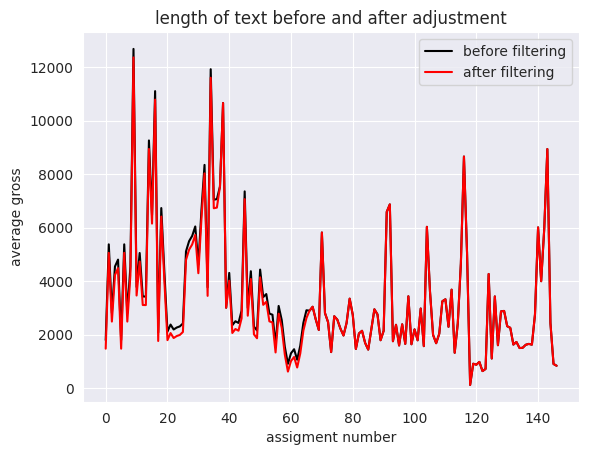

In [15]:
#graph to check if there are any anamolies while removing the author info

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

sns.lineplot(text_df['text_length'],color='black',label='before filtering')
sns.lineplot(text_df['Text_length'],color='red',label='after filtering')
plt.ylabel('average gross')
plt.xlabel('assigment number')
plt.title('length of text before and after adjustment')

In [16]:
#removing excess columns
text_df=text_df.drop(columns=['text','text_length'])

In [17]:
# creating copy for a clean text
text_df2=text_df.copy()

In [18]:
#cleaning the text in text_df2

# removing part from words end with "'s"
text_df2['Text']=text_df2['Text'].apply(lambda x:re.sub(r"(\w+)[’']s", r"\1", x))

# removing punctuations and numericals except hyphen(-)
text_df2['Text']=text_df2['Text'].apply(lambda x:re.sub(r'[^\w\s-]|_|\d',' ', x))

# make all letters small(lower)
text_df2['Text']=text_df2['Text'].apply(str.lower)

# removing excess whitespace
text_df2['Text']=text_df2['Text'].apply(lambda x:' '.join(x.split()))


# Text Analysis

In [19]:
# imports for text analysis
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize,TextTilingTokenizer
from nltk.corpus import cmudict
nltk.download('punkt')
nltk.download('cmudict')
nltk.download('stopwords')
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# common function for loading words from text
def load_words_from_file(filename):
  words=set()
  with open(filename,'r',encoding='latin-1') as file:
    for line in file:
      #split on the '|' character
      parts=line.strip().split('|')
      word=parts[0].strip()
      words.add(word)
  return words

#loading stopwords
stop_files=['StopWords_Auditor.txt','StopWords_Currencies.txt','StopWords_DatesandNumbers.txt','StopWords_Generic.txt','StopWords_GenericLong.txt','StopWords_Geographic.txt','StopWords_Names.txt']
stop_words_s=set()
for file in stop_files:
  filepath='/content/drive/MyDrive/Blackcoffer-Nov/'+file
  stop_words_s.update(load_words_from_file(filepath))

#loading positive words
filepath2='/content/drive/MyDrive/Blackcoffer-Nov/'+'positive-words.txt'
positive_words=load_words_from_file(filepath2)

#loading negetive words
filepath3='/content/drive/MyDrive/Blackcoffer-Nov/'+'negative-words.txt'
negative_words=load_words_from_file(filepath3)

In [21]:
stop_words_l={word.lower() for word in stop_words_s}
list(stop_words_l)[0:5]

['willie', 'lambert', 'sample', 'lavelle', 'lavalley']

In [22]:
list(positive_words)[0:5]

['sharper', 'catchy', 'pinnacle', 'tops', 'swank']

In [23]:
def sentiment(text):
  tokens=word_tokenize(text)
  #removing stopwords
  tokens=[word for word in tokens if word.lower() not in stop_words_l]
  total_words_aftercleaning=len(tokens)
  positive_score=sum(1 for word in tokens if word in positive_words)
  negative_score=sum(1 for word in tokens if word in negative_words)
  polarity_score=(positive_score-negative_score)/((negative_score+positive_score)+0.000001)
  subjective_score=(negative_score+positive_score)/(total_words_aftercleaning+0.000001)
  return positive_score,negative_score,polarity_score,subjective_score,total_words_aftercleaning


text_df[['positive_score','negative_score','polarity_score','subjective_score','word_count']]=text_df2['Text'].apply(sentiment).apply(pd.Series)

In [24]:
# function for avg_sentence_length and avg number of words per sentence

def avg_number_of_words_per_sentence(text):
  t = re.sub(r"(\w+)[’']s", r"\1",text)
  t=re.sub(r'[^\w\s-]|_|\d',' ', t)
  t=' '.join(t.split())
  total_sentence_length = 0
  sentences=sent_tokenize(text)
  for sentence in sentences:
    total_sentence_length+=len(sentence)
  total_sentences=len(sentences)
  avg_sentence_length=total_sentence_length/total_sentences

  total_words=len(word_tokenize(t))
  avg_number_of_words_per_sentence=total_words/total_sentences if total_sentences>0 else 0

  return avg_sentence_length,avg_number_of_words_per_sentence

text_df[['avg_sentence_length','avg_number_of_words_per_sentence']]=text_df['Text'].apply(avg_number_of_words_per_sentence).apply(pd.Series)

In [26]:
# function for syallble count ,percentage of complex words and total complex words

def syllable_count(word):
    syllable_count = 0
    vowels = 'aeiouy'
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels:
          if word[index - 1] not in vowels:
            syllable_count += 1
          elif index>2 and word[index-1] in vowels and word[index-2] in vowels:
            syllable_count += 1
    if word.endswith('e'):
        syllable_count -= 1
    if word.endswith('hed'):
        syllable_count -= 1
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    return syllable_count

# Function to calculate complex words using tokenization
def complex_words(text):
  words = word_tokenize(text)
  complex_word_count = sum(1 for word in words if syllable_count(word) >= 3)
  total_words = len(words)
  complex_word_percentage = (complex_word_count / total_words) * 100 if total_words > 0 else 0
  return complex_word_percentage,complex_word_count

# function for total syllable count
def count_syllables_in_text(text):
  words = word_tokenize(text)
  syllable_counts=sum(syllable_count(word) for word in words)
  return syllable_counts



text_df[['complex_word_percentage','complex_word_count']]=text_df2['Text'].apply(complex_words).apply(pd.Series)
text_df['syllable_counts']=text_df2['Text'].apply(count_syllables_in_text)

In [27]:
#Fog index

text_df['fog_index']=0.4*(text_df['avg_sentence_length']+text_df['complex_word_percentage'])

In [28]:
# function for personal pronouns

def personal_pronouns(text):
  pp=text.count('i')+text.count('me')+text.count('my')+text.count('we')+text.count('us')+text.count('our')
  return pp
text_df['personal_pronouns']=text_df2['Text'].apply(personal_pronouns)


In [29]:
def avg_word_length(text):
  words=word_tokenize(text)
  word_length=0
  total_words=len(words)
  for word in words:
    word_length+=len(word)
  return word_length/total_words

text_df['average_word_length']=text_df2['Text'].apply(avg_word_length)

In [30]:
text_df=text_df.drop(columns=['Text','Text_length'])
text_df.head()

,URL_ID,URL,positive_score,negative_score,polarity_score,subjective_score,word_count,avg_sentence_length,avg_number_of_words_per_sentence,complex_word_percentage,complex_word_count,syllable_counts,fog_index,personal_pronouns,average_word_length
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...,5.0,1.0,0.666667,0.042857,140.0,369.250000,54.000000,21.759259,47.0,399,156.403704,114,5.708333
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...,11.0,8.0,0.157895,0.050802,374.0,147.794118,24.735294,16.646849,140.0,1384,65.776387,346,4.847800
2,Netclan20241019,https://insights.blackcoffer.com/roas-dashboar...,11.0,4.0,0.466667,0.057692,260.0,248.300000,39.300000,16.793893,66.0,689,106.037557,166,5.216285
3,Netclan20241020,https://insights.blackcoffer.com/efficient-pro...,23.0,12.0,0.314286,0.090909,385.0,168.240000,22.080000,42.210145,233.0,1264,84.180058,373,6.521739
4,Netclan20241021,https://insights.blackcoffer.com/development-o...,9.0,2.0,0.636364,0.025463,432.0,108.487805,15.829268,24.345146,158.0,1244,53.133181,336,5.530046


In [31]:
#exporting to folder in drive
folder_path='/content/drive/MyDrive/Blackcoffer-Nov/'
file_path = folder_path + 'output data structure.xlsx'
text_df.to_excel(file_path, index=False)

In [32]:
'''
def _syllables(word):
    syllable_count = 0
    vowels = 'aeiouy'
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels:
          if word[index - 1] not in vowels:
            syllable_count += 1
          elif index>2 and word[index-1] in vowels and word[index-2] in vowels:
            syllable_count += 1
    if word.endswith('e'):
        syllable_count -= 1
    if word.endswith('hed'):
        syllable_count -= 1
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    return syllable_count

_syllables('beyonce')
'''

'''
# Load the CMU Pronouncing Dictionary for syllable count
d = cmudict.dict()

# Helper function to count syllables
def syllable_count(word):
  if word in d:
    return max([len([y for y in x if y[-1].isdigit()]) for x in d[word]])
  else:
     # estimating syllables for words not in the dictionary
    return sum(1 for letter in word if letter in 'aeiouy')
'''

"\n# Load the CMU Pronouncing Dictionary for syllable count\nd = cmudict.dict()\n\n# Helper function to count syllables\ndef syllable_count(word):\n  if word in d:\n    return max([len([y for y in x if y[-1].isdigit()]) for x in d[word]])\n  else:\n     # estimating syllables for words not in the dictionary\n    return sum(1 for letter in word if letter in 'aeiouy')\n"